In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Import citipy 
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 82.83,
  'feels_like': 89.4,
  'temp_min': 78.89,
  'temp_max': 86.13,
  'pressure': 1014,
  'humidity': 75},
 'visibility': 10000,
 'wind': {'speed': 5.99, 'deg': 281, 'gust': 15.01},
 'clouds': {'all': 40},
 'dt': 1626443003,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1626427299,
  'sunset': 1626481115},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [8]:
# Get the JSON data.
boston_data = city_weather.json()

In [9]:
boston_data['sys']['country']

'US'

In [10]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 86.13 75 40 5.99


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-07-16 13:43:23'

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mushie
Processing Record 2 of Set 1 | quang ngai
Processing Record 3 of Set 1 | vvedenskoye
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | kaihua
Processing Record 8 of Set 1 | araxa
Processing Record 9 of Set 1 | cayenne
Processing Record 10 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | faya
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | kiunga
Processing Record 15 of Set 1 | nouadhibou
Processing Record 16 of Set 1 | hambantota
Processing Record 17 of Set 1 | bengkulu
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | chinhoyi
Processing Record 20 of Set 1 | angoche
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of Set 1 | taolanaro
City not found. Skipping

Processing Record 38 of Set 4 | severo-kurilsk
Processing Record 39 of Set 4 | kahului
Processing Record 40 of Set 4 | jalu
Processing Record 41 of Set 4 | ahvaz
Processing Record 42 of Set 4 | shkotovo-22
City not found. Skipping...
Processing Record 43 of Set 4 | souillac
Processing Record 44 of Set 4 | omboue
Processing Record 45 of Set 4 | lengshuitan
Processing Record 46 of Set 4 | danielskuil
Processing Record 47 of Set 4 | talnakh
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | karaton
Processing Record 50 of Set 4 | goure
Processing Record 1 of Set 5 | brae
Processing Record 2 of Set 5 | kampong thum
Processing Record 3 of Set 5 | riosucio
Processing Record 4 of Set 5 | la ronge
Processing Record 5 of Set 5 | beaverlodge
Processing Record 6 of Set 5 | luganville
Processing Record 7 of Set 5 | poum
Processing Record 8 of Set 5 | steinkjer
Processing Record 9 of Set 5 | pilar
Processing Record 10 of Set 5 | opuwo
Processing Record 11 of Set 5 | kpand

Processing Record 28 of Set 8 | nador
Processing Record 29 of Set 8 | antsohihy
Processing Record 30 of Set 8 | talcahuano
Processing Record 31 of Set 8 | porto velho
Processing Record 32 of Set 8 | flinders
Processing Record 33 of Set 8 | neryungri
Processing Record 34 of Set 8 | kautokeino
Processing Record 35 of Set 8 | hualmay
Processing Record 36 of Set 8 | minsk
Processing Record 37 of Set 8 | victoria point
Processing Record 38 of Set 8 | ust-nera
Processing Record 39 of Set 8 | lumsden
Processing Record 40 of Set 8 | maceio
Processing Record 41 of Set 8 | saint george
Processing Record 42 of Set 8 | kralendijk
Processing Record 43 of Set 8 | singaraja
Processing Record 44 of Set 8 | high prairie
Processing Record 45 of Set 8 | barra patuca
Processing Record 46 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 8 | santa marta
Processing Record 48 of Set 8 | yerbogachen
Processing Record 49 of Set 8 | carutapera
Processing Record 50 of Set 

Processing Record 15 of Set 12 | san cristobal
Processing Record 16 of Set 12 | igrim
Processing Record 17 of Set 12 | harper
Processing Record 18 of Set 12 | tarakan
Processing Record 19 of Set 12 | sinnamary
Processing Record 20 of Set 12 | acucena
Processing Record 21 of Set 12 | cururupu
Processing Record 22 of Set 12 | saint-georges
Processing Record 23 of Set 12 | campoverde
Processing Record 24 of Set 12 | cotonou
Processing Record 25 of Set 12 | merauke
Processing Record 26 of Set 12 | capela do alto
Processing Record 27 of Set 12 | prince rupert
Processing Record 28 of Set 12 | san borja
Processing Record 29 of Set 12 | mackay
Processing Record 30 of Set 12 | muisne
Processing Record 31 of Set 12 | mamburao
Processing Record 32 of Set 12 | bahia blanca
Processing Record 33 of Set 12 | bolobo
Processing Record 34 of Set 12 | sola
Processing Record 35 of Set 12 | walvis bay
Processing Record 36 of Set 12 | saint-michel-des-saints
Processing Record 37 of Set 12 | manono
Processin

In [13]:
print(len(city_data))

582


In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mushie,-3.0167,16.9000,101.35,16,28,5.06,CD,2021-07-16 13:44:15
1,Quang Ngai,15.1167,108.8000,76.55,91,91,5.95,VN,2021-07-16 13:42:55
2,Vvedenskoye,55.4753,65.0847,70.25,49,19,5.06,RU,2021-07-16 13:44:16
3,Rikitea,-23.1203,-134.9692,71.91,65,0,2.33,PF,2021-07-16 13:44:16
4,Cape Town,-33.9258,18.4232,68.41,47,0,3.00,ZA,2021-07-16 13:41:55
5,Tasiilaq,65.6145,-37.6368,48.36,78,18,6.46,GL,2021-07-16 13:44:17
6,Kaihua,23.3687,104.2800,66.76,95,100,4.79,CN,2021-07-16 13:44:17
7,Araxa,-19.5933,-46.9406,71.56,49,0,5.75,BR,2021-07-16 13:44:17
8,Cayenne,4.9333,-52.3333,84.24,70,0,1.14,GF,2021-07-16 13:39:28
9,Ushuaia,-54.8000,-68.3000,29.86,86,75,5.75,AR,2021-07-16 13:40:00


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mushie,CD,2021-07-16 13:44:15,-3.0167,16.9000,101.35,16,28,5.06
1,Quang Ngai,VN,2021-07-16 13:42:55,15.1167,108.8000,76.55,91,91,5.95
2,Vvedenskoye,RU,2021-07-16 13:44:16,55.4753,65.0847,70.25,49,19,5.06
3,Rikitea,PF,2021-07-16 13:44:16,-23.1203,-134.9692,71.91,65,0,2.33
4,Cape Town,ZA,2021-07-16 13:41:55,-33.9258,18.4232,68.41,47,0,3.00
5,Tasiilaq,GL,2021-07-16 13:44:17,65.6145,-37.6368,48.36,78,18,6.46
6,Kaihua,CN,2021-07-16 13:44:17,23.3687,104.2800,66.76,95,100,4.79
7,Araxa,BR,2021-07-16 13:44:17,-19.5933,-46.9406,71.56,49,0,5.75
8,Cayenne,GF,2021-07-16 13:39:28,4.9333,-52.3333,84.24,70,0,1.14
9,Ushuaia,AR,2021-07-16 13:40:00,-54.8000,-68.3000,29.86,86,75,5.75


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

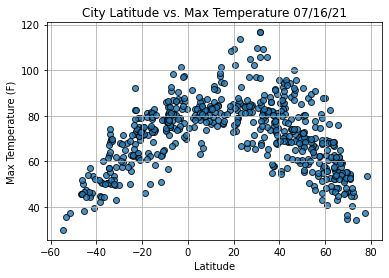

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

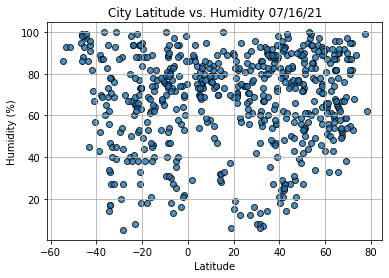

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

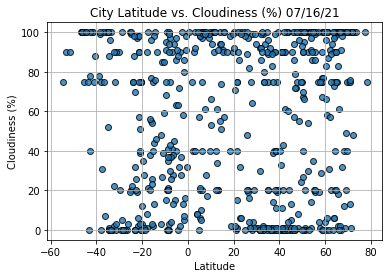

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


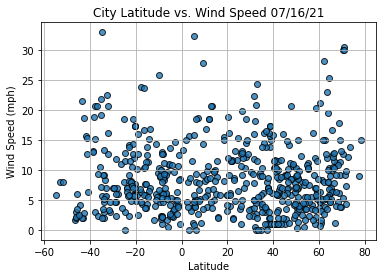

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()